In [2]:
import numpy as np
import pandas as pd

In [4]:
data= pd.read_csv('placement.csv')

In [5]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
# data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [10]:
data.shape
data = data.iloc[:, 1:]

In [12]:
import matplotlib.pyplot as plt

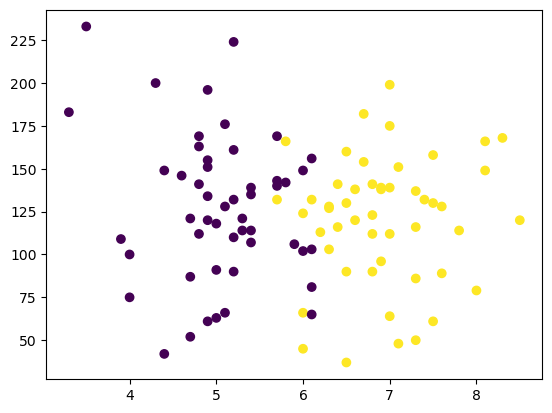

In [61]:
plt.scatter(data['cgpa'], data['iq'], c= data['placement'])
# plt.show()

In [31]:
X= data.iloc[:, 0:2]
Y= data.iloc[:,-1]
X.ndim

2

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.1)

In [19]:
x_train

,cgpa,iq
26,7.0,199.0
94,4.7,52.0
24,4.7,121.0
93,6.8,112.0
20,6.6,120.0
...,...,...
1,5.9,106.0
45,6.0,66.0
29,7.0,112.0
38,6.5,160.0


In [20]:
y_test

49    0
0     1
41    0
85    1
84    0
91    1
4     0
92    0
10    1
63    1
Name: placement, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train= scaler.fit_transform(x_train)

In [36]:
X_train

array([[-0.58381666, -0.26393416],
       [ 0.02412466, -0.0046102 ],
       [ 0.89261225, -1.56055395],
       [ 0.28467094,  0.07318698],
       [-0.9312117 ,  1.86252229],
       [-2.14709434,  2.82202093],
       [-0.75751418,  1.34387438],
       [-1.3654555 , -2.13106666],
       [ 1.41370481,  0.09911938],
       [ 1.15315853,  0.33251094],
       [-0.67066542, -0.36766374],
       [-1.01806046, -0.31579895],
       [ 0.45836845,  0.92895604],
       [ 1.32685605, -1.63835114],
       [-0.67066542,  0.20284896],
       [-0.84436294, -0.16020458],
       [ 1.84794861,  0.64369969],
       [ 0.89261225,  1.31794198],
       [-2.32079186,  1.52540115],
       [ 0.11097342, -1.11970322],
       [ 1.15315853, -0.21206937],
       [-1.71285054, -0.6269877 ],
       [-1.01806046,  1.00675323],
       [ 0.11097342,  0.82522646],
       [-1.01806046,  1.16234761],
       [-0.23642162,  0.20284896],
       [ 0.37151969,  0.43624052],
       [ 0.28467094, -0.54919051],
       [-1.7996993 ,

In [40]:
X_test= scaler.transform(x_test)

In [41]:
X_test

array([[ 0.02412466,  0.64369969],
       [ 0.63206597,  1.49946875],
       [-1.10490922, -0.96410885],
       [-0.9312117 ,  0.69556448],
       [ 0.02412466, -2.05326947],
       [ 1.76109985, -1.17156801],
       [ 0.28467094,  0.09911938],
       [-0.75751418, -1.50868916],
       [ 0.80576349, -0.73071728],
       [ 0.89261225,  1.94031948]])

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [43]:
clf.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred=clf.predict(X_test)

In [45]:
y_test

33    0
97    1
23    0
89    0
10    1
58    1
63    1
9     0
66    1
26    1
Name: placement, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, y_pred)

0.8

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

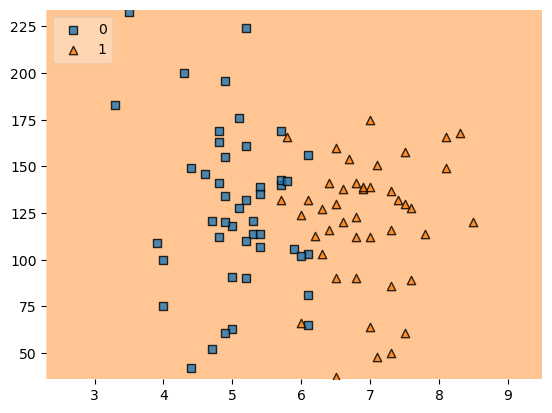

In [62]:
plot_decision_regions(x_train.values, y_train.values, clf=clf, legend=2)

In [63]:
import pickle

In [64]:
pickle.dump(clf, open('model.pkl', 'wb'))